In [201]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv

In [202]:
load_dotenv()
API_KEY = os.getenv("EIA_TOKEN")

In [41]:
def get_data(api_key=API_KEY, series_id=None, start_date=None, end_date=None, interval='monthly'):
    url = f"https://api.eia.gov/v2/petroleum/crd/crpdn/data/?api_key={api_key}&start{start_date}&frequency={interval}"

    r = requests.get(url)
    data = r.json()

    #data = data['series'][0]['data'][0]
    return data

In [49]:
#start day = today - 1 year
start_date = '2022-01'

data = get_data(series_id='PET.WPRODUC.WORLD-PETRO.M',start_date=start_date ,interval='monthly')

In [50]:
data

{'response': {'warnings': [{'warning': 'incomplete return',
    'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}],
  'total': 41120,
  'dateFormat': 'YYYY-MM',
  'frequency': 'monthly',
  'data': [{'period': '1981-01',
    'duoarea': 'SSD',
    'area-name': 'USA-SD',
    'product': 'EPC0',
    'product-name': 'Crude Oil',
    'process': 'FPF',
    'process-name': 'Field Production',
    'series': 'MCRFPSD1',
    'series-description': 'South Dakota Field Production of Crude Oil (Thousand Barrels)'},
   {'period': '1981-04',
    'duoarea': 'SSD',
    'area-name': 'USA-SD',
    'product': 'EPC0',
    'product-name': 'Crude Oil',
    'process': 'FPF',
    'process-name': 'Field Production',
    'series': 'MCRFPSD1',
    'series-description': 'South Dakota Field Production of Crude Oil (Thousand Barrels)'},
   {'period': '1981-10',
    'duoarea': 'SSD',
    'area-nam

In [51]:
url = f"https://api.eia.gov/v2/petroleum/?api_key={API_KEY}"
r = requests.get(url)
data = r.json()

In [52]:
data

{'response': {'id': 'petroleum',
  'name': 'Petroleum',
  'description': 'EIA petroleum gas survey data',
  'routes': [{'id': 'sum', 'name': 'Summary'},
   {'id': 'pri', 'name': 'Prices'},
   {'id': 'crd', 'name': 'Crude Reserves and Production'},
   {'id': 'pnp', 'name': 'Refining and Processing'},
   {'id': 'move', 'name': 'Imports/Exports and Movements'},
   {'id': 'stoc', 'name': 'Stocks'},
   {'id': 'cons', 'name': 'Consumption/Sales'}]},
 'request': {'command': '/v2/petroleum/',
  'params': {'api_key': 'cH2rbrRMzTedExBIE6okFZvmLQCkpjmys1rjwiVY'}},
 'apiVersion': '2.1.4'}

In [203]:
frequency = 'monthly'
url = f"https://api.eia.gov/v2/petroleum/crd/crpdn/data/?api_key={API_KEY}&\
frequency={frequency}&start=2015-12&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0"
r = requests.get(url)
data = r.json()

In [169]:
data = data['response']['data']

In [170]:
df = pd.DataFrame(data)

In [171]:
df

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2023-02,SNV,USA-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,17,MBBL
1,2023-02,SLA,USA-LA,EPC0,Crude Oil,FPF,Field Production,MCRFPLA2,Louisiana Field Production of Crude Oil (Thous...,99,MBBL/D
2,2023-02,SWY,USA-WY,EPC0,Crude Oil,FPF,Field Production,MCRFPWY1,Wyoming Field Production of Crude Oil (Thousan...,6805,MBBL
3,2023-02,RAKS,NA,EPC0,Crude Oil,FPF,Field Production,MCRFPAKS1,Alaska South Field Production of Crude Oil (Th...,253,MBBL
4,2023-02,SMO,USA-MO,EPC0,Crude Oil,FPF,Field Production,MCRFPMO1,Missouri Field Production of Crude Oil (Thousa...,5,MBBL
...,...,...,...,...,...,...,...,...,...,...,...
4995,2018-02,SNE,USA-NE,EPC0,Crude Oil,FPF,Field Production,MCRFPNE2,Nebraska Field Production of Crude Oil (Thousa...,6,MBBL/D
4996,2018-02,SVA,USA-VA,EPC0,Crude Oil,FPF,Field Production,MCRFPVA2,Virginia Field Production of Crude Oil (Thousa...,0,MBBL/D
4997,2018-02,SND,USA-ND,EPC0,Crude Oil,FPF,Field Production,MCRFPND1,North Dakota Field Production of Crude Oil (Th...,32501,MBBL
4998,2018-02,SCA,CALIFORNIA,EPC0,Crude Oil,FPF,Field Production,MCRFPCA1,California Field Production of Crude Oil (Thou...,13050,MBBL


In [160]:
df['barrels_per_month'] = df.apply(lambda x: int(x['value'])*30 if x['units'] == 'MBBL/D' else int(x['value']), axis=1)

In [161]:
df['period'] = pd.to_datetime(df['period'])

In [162]:
df = df.set_index('period')

In [163]:
df_MBBL = df['barrels_per_month']

In [164]:
df_MBBL = df_MBBL.groupby('period').sum()

In [165]:
df_MBBL = df_MBBL.sort_index(ascending=False)

In [166]:
df_MBBL

period
2023-02-01    1473914
2023-01-01    1556715
2022-12-01    1509347
2022-11-01    1512246
2022-10-01    1541371
               ...   
2018-06-01    1303972
2018-05-01    1303331
2018-04-01    1289821
2018-03-01    1308191
2018-02-01    1109624
Name: barrels_per_month, Length: 61, dtype: int64

In [192]:
url = f"https://api.eia.gov/v2/petroleum/stoc/cu/data/?api_key={API_KEY}&\
    frequency={frequency}&start=2015-12&data[0]=value&sort[0][column]=period&\
    sort[0][direction]=desc&offset=0"

r = requests.get(url)
data = r.json()

data = data['response']['data']

In [193]:
df = pd.DataFrame(data)
df['period'] = pd.to_datetime(df['period'])
df = df.set_index('period')

In [194]:
storage_data = df['value']
storage_data = storage_data.groupby('period').sum()
storage_data = storage_data.sort_index(ascending=False)

In [195]:
storage_data = storage_data.rename('storage')


In [196]:
#merge storage_data and df_MBBL on period
df = pd.merge(df_MBBL, storage_data, on='period')

<AxesSubplot:xlabel='period'>

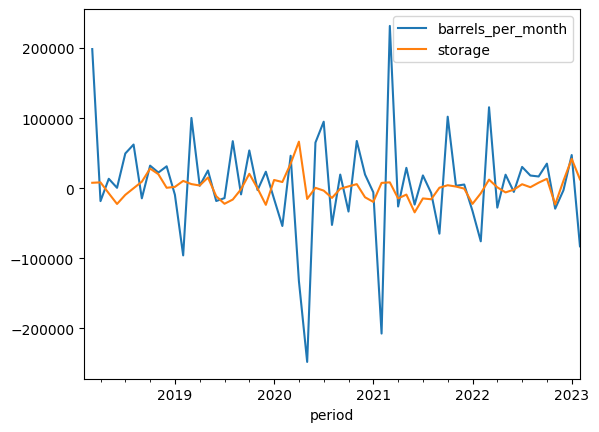

In [197]:
df_change = df.diff(periods=-1)
#plot df_change as line
df_change.plot.line()

<AxesSubplot:xlabel='period'>

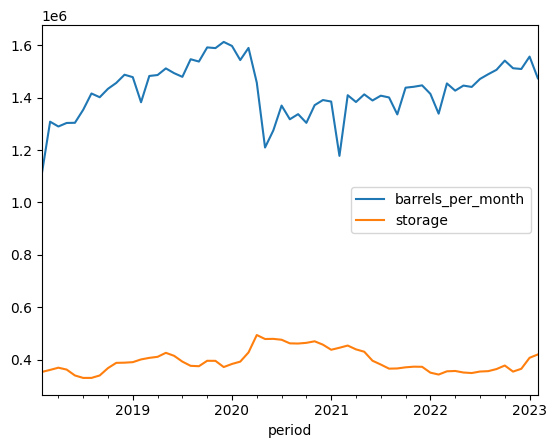

In [199]:
df.plot.line()

In [200]:
url = f"https://api.eia.gov/v2/petroleum/move/exp/data/?api_key={API_KEY}&\
    frequency=monthly&data[0]=value&facets[product][]=EP00&\
    facets[product][]=EPC0&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

r = requests.get(url)
data = r.json()


KeyError: 'response'